In [1]:
%load_ext autoreload
%matplotlib inline

In [2]:
import os
import glob
import sys
import yaml

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tempest.plots.plot1d import set_x_axis_invlog, show_data

from tempest import casestudy
from tempest import grid
from tempest import joint_distrib
from tempest import handler
from tempest import distribution

settings_path = 'settings/tropics.yaml'

In [3]:
# Instantiate CaseStudy by passing the settings. 
# Should also create appropriate directories
hdlr = handler.Handler(settings_path)
cs = casestudy.CaseStudy(hdlr, verbose = True)
gr = grid.Grid(hdlr, verbose = False, overwrite = False)
# jd = joint_distrib.JointDistribution(gr)

if __name__ == '__main__':
    # print("Loaded Configuration:")
    # for key, value in settings.items():
    #     print(f"{key}: {value}")
    
    #gr.compute_funcs_for_var_id()
    pass

Data loaded from /homedata/mcarenso/tempest/DYAMOND_SAM_Tropics/var_id_days_i_t.json
LWNTA
day:      (#t)  t_i-t_f
16-08-01: (47) 1-47
16-08-02: (48) 48-95
16-08-03: (48) 96-143
16-08-04: (48) 144-191
16-08-05: (48) 192-239
16-08-06: (48) 240-287
16-08-07: (48) 288-335
16-08-08: (48) 336-383
16-08-09: (48) 384-431
16-08-10: (48) 432-479
16-08-11: (48) 480-527
16-08-12: (48) 528-575
16-08-13: (48) 576-623
16-08-14: (48) 624-671
16-08-15: (48) 672-719
16-08-16: (48) 720-767
16-08-17: (48) 768-815
16-08-18: (48) 816-863
16-08-19: (48) 864-911
16-08-20: (48) 912-959
16-08-21: (48) 960-1007
16-08-22: (48) 1008-1055
16-08-23: (48) 1056-1103
16-08-24: (48) 1104-1151
16-08-25: (48) 1152-1199
16-08-26: (48) 1200-1247
16-08-27: (48) 1248-1295
16-08-28: (48) 1296-1343
16-08-29: (48) 1344-1391
16-08-30: (48) 1392-1439
16-08-31: (48) 1440-1487
16-09-01: (48) 1488-1535
16-09-02: (48) 1536-1583
16-09-03: (48) 1584-1631
16-09-04: (48) 1632-1679
16-09-05: (48) 1680-1727
16-09-06: (48) 1728-1775
16-09-0

In [4]:
jd = joint_distrib.JointDistribution(gr, nd=5)

In [5]:
d1l = distribution.Distribution(name = 'mean Precipitation',  bintype = "linear", nd = 5, fill_last_decade=True)
d1l.compute_distribution(jd.sample1)

d2l = distribution.Distribution(name = 'max Precipitation',  bintype = "linear", nd = 5, fill_last_decade=True)
d2l.compute_distribution(jd.sample2)


In [6]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(5,3))
colors = ['lightcoral', 'blue']
plt.yscale('log')
for i, d in enumerate([d2l, d1l]):
    density = d.density
    bins = d.bins
    label = d.name + ' '
    unity_density = density / density.sum()
    widths = bins[1:] - bins[:-1]
    ax1.bar(bins[1:], unity_density, width = widths, label = label, color = colors[i])
plt.xlabel("Precipication (mm/hour)")
plt.ylabel("Probability")
plt.title("Distributions regridded")
plt.legend()

In [7]:
d1il = distribution.Distribution(name = 'mean Precipitation',  bintype = "invlogQ", nd = 5, fill_last_decade=True)
d1il.compute_distribution(jd.sample1)

d2il = distribution.Distribution(name = 'max Precipitation',  bintype = "invlogQ", nd = 5, fill_last_decade=True)
d2il.compute_distribution(jd.sample2)

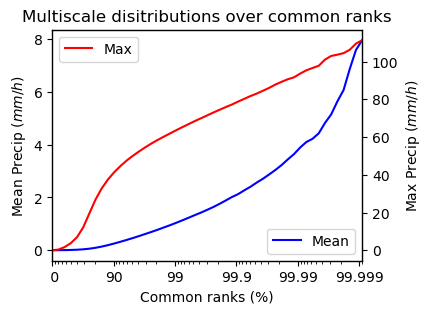

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(ncols=1, figsize=(4, 3))

ranks1, ranks2 = d1il.ranks, d2il.ranks
perc1, perc2 = d1il.percentiles, d2il.percentiles

#--- on IL x axis
ax_show1 = ax.twiny()
ax_show2 = ax.twiny()
# Set frame for the main x-axis
set_x_axis_invlog(ax, ranks1)

_, ax1 = show_data(ax_show1, ranks1, perc1, rankmin=0, rankmax=99.999, color = 'blue', label = 'Mean')
_, ax2 = show_data(ax_show2, ranks2, perc2, rankmin=0, rankmax=99.999, color = 'red', label = 'Max', invert = True)

# Labels
ax.set_xlabel('Common ranks (%)')
ax.set_ylabel('Mean Precip $(mm/h)$')

ax2.set_ylabel('Max Precip $(mm/h)$')

plt.title("Multiscale disitributions over common ranks")
ax1.legend(loc = "lower right")
plt.legend(loc = "upper left")
plt.show()

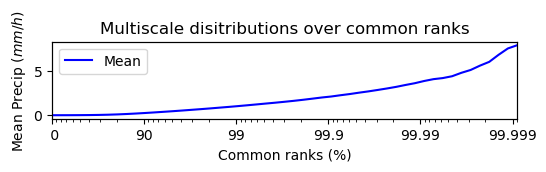

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(ncols=1, figsize=(6, 1))

ranks1, ranks2 = d1il.ranks, d2il.ranks
perc1, perc2 = d1il.percentiles, d2il.percentiles

#--- on IL x axis
ax_show1 = ax.twiny()
# ax_show2 = ax.twiny()
# Set frame for the main x-axis
set_x_axis_invlog(ax, ranks1)

_, ax1 = show_data(ax_show1, ranks1, perc1, rankmin=0, rankmax=99.999, color = 'blue', label = 'Mean')
# _, ax2 = show_data(ax_show2, ranks2, perc2, rankmin=0, rankmax=99.999, color = 'red', label = 'Max', invert = True)

# Labels
ax.set_xlabel('Common ranks (%)')
ax.set_ylabel('Mean Precip $(mm/h)$')

# ax2.set_ylabel('Max Precip $(mm/h)$')

plt.title("Multiscale disitributions over common ranks")
ax1.legend(loc = "lower right")
plt.legend(loc = "upper left")
plt.show()

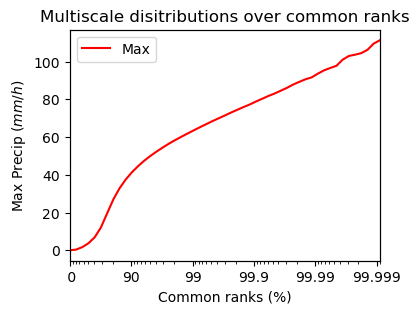

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(ncols=1, figsize=(4, 3))

ranks1, ranks2 = d1il.ranks, d2il.ranks
perc1, perc2 = d1il.percentiles, d2il.percentiles

#--- on IL x axis
ax_show1 = ax.twiny()
# Set frame for the main x-axis
set_x_axis_invlog(ax, ranks1)

_, ax1 = show_data(ax_show1, ranks2, perc2, rankmin=0, rankmax=99.999, color = 'red', label = 'Max')

# Labels
ax.set_xlabel('Common ranks (%)')
ax.set_ylabel('Max Precip $(mm/h)$')

# ax2.set_ylabel('Max Precip $(mm/h)$')

plt.title("Multiscale disitributions over common ranks")
ax1.legend(loc = "lower right")
plt.legend(loc = "upper left")
plt.show()

In [42]:
settings_path = 'settings/ep_itcz.yaml'

# Instantiate CaseStudy by passing the settings. 
# Should also create appropriate directories
hdlr = handler.Handler(settings_path)
cs = casestudy.CaseStudy(hdlr, verbose = True)
gr = grid.Grid(hdlr, verbose = False, overwrite = False)
# jd = joint_distrib.JointDistribution(gr)

if __name__ == '__main__':
    # print("Loaded Configuration:")
    # for key, value in settings.items():
    #     print(f"{key}: {value}")
    
    #gr.compute_funcs_for_var_id()
    pass

Data loaded from /homedata/mcarenso/tempest/DYAMOND_SAM_Easter_Pacific_ITCZ/var_id_days_i_t.json
LWNTA
day:      (#t)  t_i-t_f
16-08-01: (47) 1-47
16-08-02: (48) 48-95
16-08-03: (48) 96-143
16-08-04: (48) 144-191
16-08-05: (48) 192-239
16-08-06: (48) 240-287
16-08-07: (48) 288-335
16-08-08: (48) 336-383
16-08-09: (48) 384-431
16-08-10: (48) 432-479
16-08-11: (48) 480-527
16-08-12: (48) 528-575
16-08-13: (48) 576-623
16-08-14: (48) 624-671
16-08-15: (48) 672-719
16-08-16: (48) 720-767
16-08-17: (48) 768-815
16-08-18: (48) 816-863
16-08-19: (48) 864-911
16-08-20: (48) 912-959
16-08-21: (48) 960-1007
16-08-22: (48) 1008-1055
16-08-23: (48) 1056-1103
16-08-24: (48) 1104-1151
16-08-25: (48) 1152-1199
16-08-26: (48) 1200-1247
16-08-27: (48) 1248-1295
16-08-28: (48) 1296-1343
16-08-29: (48) 1344-1391
16-08-30: (48) 1392-1439
16-08-31: (48) 1440-1487
16-09-01: (48) 1488-1535
16-09-02: (48) 1536-1583
16-09-03: (48) 1584-1631
16-09-04: (48) 1632-1679
16-09-05: (48) 1680-1727
16-09-06: (48) 1728-

In [43]:
jd = joint_distrib.JointDistribution(gr, nd=4)

/home/mcarenso/code/tempest/tempest/joint_distrib.py:364: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c


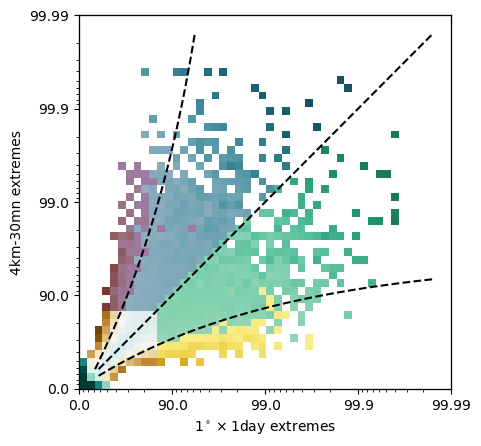

In [45]:
jd.plot(branch=True)

In [46]:
data, noise = jd.get_mcs_bin_fraction()
jd.plot_data(data, noise, branch=False)

AttributeError: 'JointDistribution' object has no attribute 'mask_labels_regridded_yxt'